# Surrogate modeling

In [1]:
import sklearn
import numpy as np
import pandas as pd

In [104]:
# read in stage error file, gauge file and params file
gauges= np.loadtxt('gauges.txt', delimiter=' ')
stats= np.loadtxt('stage_error.txt', delimiter=',')
params= np.loadtxt('params.txt', delimiter=' ', dtype={'names':['name','min','max'],
                                        'formats': ['S8','f4','f4']})
input_params= np.loadtxt('Input_params.txt', delimiter=' ')
input_params= input_params[:83,:4]

In [28]:
stats= stats[10:]

In [38]:
df= pd.DataFrame(columns=['%08d'%gauge for gauge in gauges[:,0]])
for i, col in enumerate(df.columns):
    df.loc[:, col]= stats[:,3][i::len(gauges)]

In [39]:
df

,08073700,08074000,08074500,08075110,08076700,08075000,08075500,08075730,08075770,08074540
0,0.082034,-0.045716,0.288298,0.606465,0.249091,0.099223,0.273123,0.679034,0.413469,0.317846
1,0.049088,-0.046919,0.225753,0.496979,0.314344,0.019304,0.311953,0.814601,0.570862,0.395438
2,0.134090,-0.045334,0.499072,0.722844,0.273248,0.208799,0.275280,0.686543,0.433950,0.350153
3,0.058650,-0.044215,-0.023214,0.521394,0.196375,0.487386,0.246671,0.572180,0.319251,0.247777
4,0.100110,-0.048265,0.476947,0.683760,0.320869,0.152877,0.323867,0.835757,0.550377,0.404916
5,0.095429,-0.049120,0.400622,0.620096,0.344211,0.146352,0.343125,0.891704,0.625650,0.443621
6,0.180348,-0.051900,0.776483,0.810743,0.422416,0.360611,0.413247,0.920538,0.672726,0.594012
7,0.013804,-0.045370,0.095170,0.430655,0.300055,0.025961,0.290776,0.745413,0.514424,0.355906
8,0.222673,-0.060579,0.805809,0.840319,0.606353,0.497884,0.575056,0.577168,0.977824,0.785994
9,0.044523,-0.043077,-0.126993,0.493848,0.089862,0.625564,0.203943,0.483684,0.229875,0.205261


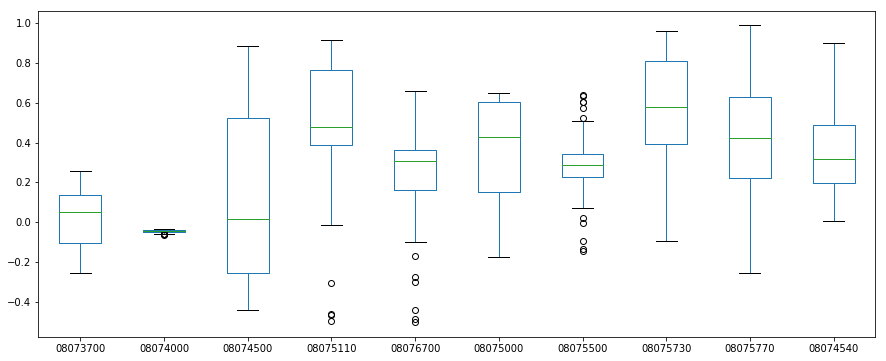

In [42]:
df.plot(kind='box', figsize=(15,6))

In [180]:
for gauge in df.columns:
    print gauge, input_params[df[gauge].argmax()]

08073700 [0.1099629  0.44745295 0.28570937 0.87507469]
08074000 [0.27270376 0.01888401 0.08574508 0.00456965]
08074500 [0.14614716 0.03630039 0.33112459 1.19269802]
08075110 [0.10845375 0.54870629 0.02606681 0.13181581]
08076700 [0.11167425 0.82900864 0.42288663 1.45157143]
08075000 [0.32217629 0.34092965 0.45664676 0.86826017]
08075500 [0.11167425 0.82900864 0.42288663 1.45157143]
08075730 [0.20043534 0.9485188  0.39494573 0.84059834]
08075770 [0.12055659 0.82318535 0.18728486 0.89388321]
08074540 [0.11167425 0.82900864 0.42288663 1.45157143]


/home/ZhiLi/CRESTHH/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


In [48]:
ts_08073700= pd.read_csv('08073700.csv')

In [49]:
ts_08073700.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1,...,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14.607866,14.800914,14.461987,14.756382,14.504142,14.709961,14.496460,14.751724,14.489440,14.693910,14.458767,14.624049,14.651340,14.739042,14.759680
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,14.495511,14.681050,14.419759,14.997368,14.442753,14.596418,14.386326,14.579981,14.415049,14.532595,14.415701,14.518426,14.506322,14.605906,14.610098
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,14.457875,14.952898,14.402528,15.064975,14.419862,14.804010,14.383239,14.792828,14.403457,14.610165,14.400001,14.766687,14.686728,14.831474,14.853252
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,14.432031,14.967173,14.390156,15.039999,14.405189,14.829308,14.375713,14.858408,14.392760,14.721485,14.388126,14.764538,14.744764,14.861744,14.883512
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,14.459005,14.980647,14.381067,15.132031,14.393702,14.834602,14.368394,14.841425,14.381987,14.739371,14.379348,14.775983,14.743893,14.854711,14.869266


In [64]:
obs_08073700= pd.read_csv('/home/ZhiLi/CRESTHH/data/streamGauge/08073700.csv', converters={'datetime': pd.to_datetime}).set_index('datetime')


In [67]:
obs_08073700= obs_08073700[(obs_08073700.index>=pd.to_datetime('20170825120000')) & (obs_08073700.index<=pd.to_datetime('20170827000000'))]

In [68]:
obs_08073700= obs_08073700.resample('120S', label='right').interpolate()

In [163]:
from sklearn import ensemble
from sklearn import cross_validation
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Ridge
# model = ensemble.forest.RandomForestRegressor(n_estimators = 10)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=2
model = make_pipeline(PolynomialFeatures(degree), Ridge())

In [165]:
model.fit(Xtrain, ytrain)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [166]:
y_pred= model.predict(Xtest)

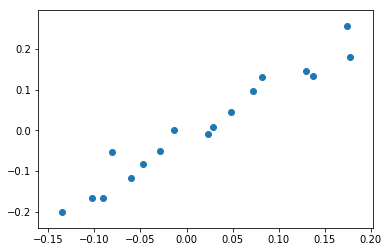

In [167]:
plt.scatter(y_pred, ytest)

In [176]:
for gauge in df.columns:
    X= input_params;Y= df[gauge]
    Xtrain, Xtest, ytrain, ytest= train_test_split(X,Y,test_size=0.2)
    model.fit(Xtrain, ytrain)
    init_stage= np.random.rand(1)*0.5
    friction= np.random.rand(1)*10
    init_SM= np.random.rand(1)*2
    B= np.random.rand(1)*20
    score=0
    while score<0.8:
        _par= np.array([init_stage, friction, init_SM, B]).reshape(1,4)
        new_score= model.predict(_par)
        if new_score>0.8:
            print gauge, _par, new_score
            score=new_score
            
        

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

08073700 [[ 0.17782792  8.16439823  1.9938962  13.95520606]] [3.97307173]


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

KeyboardInterrupt: 